##Dataset

In [1]:
import numpy as np
import pandas as pd

In [2]:
data = "https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv"

In [3]:
!wget $data

--2023-09-21 12:17:16--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: ‘housing.csv’

housing.csv         100%[===================>]   1.36M  --.-KB/s    in 0.05s   

2023-09-21 12:17:17 (26.3 MB/s) - ‘housing.csv’ saved [1423529/1423529]



In [20]:
df = pd.read_csv('housing.csv')

In [6]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [21]:

df['ocean_proximity']= df['ocean_proximity'].str.lower().str.replace(' ','_')

In [22]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,near_bay
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,near_bay
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,near_bay
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,near_bay
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,near_bay


##Exploratory Data Analysis

In [23]:
col ='ocean_proximity'
print(df[col].unique())
print(df[col].nunique())

['near_bay' '<1h_ocean' 'inland' 'near_ocean' 'island']
5


Distribution of price

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<Axes: xlabel='median_house_value', ylabel='Count'>

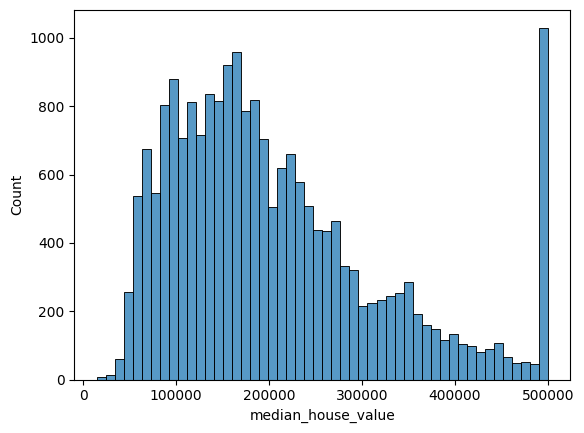

In [12]:
sns.histplot(df.median_house_value, bins =50)

<Axes: xlabel='median_house_value', ylabel='Count'>

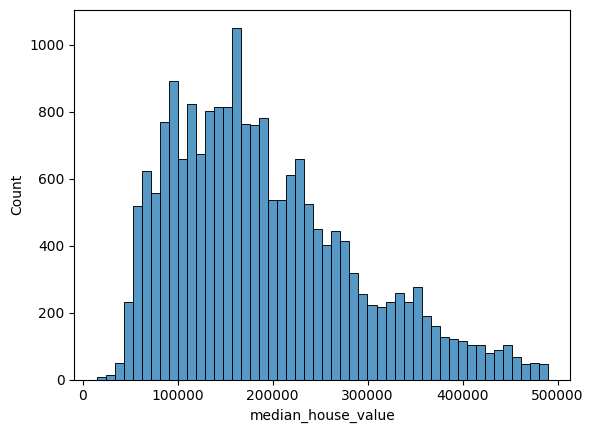

In [15]:
sns.histplot(df.median_house_value[df.median_house_value<490000], bins =50)

##Preparing the Dataset

In [30]:
df= df.loc[(df.ocean_proximity=='<1h_ocean') | (df.ocean_proximity=='inland')]
Columns = ['latitude',
'longitude',
'housing_median_age',
'total_rooms',
'total_bedrooms',
'population',
'households',
'median_income',
'median_house_value']
df = df[Columns]

In [31]:
df.columns

Index(['latitude', 'longitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

## Q.1

In [32]:
df.isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

##Q.2

In [33]:
np.median(df.population)

1195.0

## Prepare and split the dataset


In [34]:
n = len(df)
n_val = int(n*0.2)
n_test = int(n*0.2)
n_train = n - n_val-n_test

In [35]:
n_test, n_val, n_train

(3137, 3137, 9413)

In [37]:
idx = np.arange(n)
np.random.seed(42)

np.random.shuffle(idx)

In [38]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test =df.iloc[idx[n_train+n_val:]]

In [39]:
len(df_test),len(df_val),len(df_train)

(3137, 3137, 9413)

In [40]:
df_train

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
19963,36.23,-119.14,22.0,2935.0,523.0,1927.0,530.0,2.5875,70400.0
5929,34.12,-117.79,16.0,2426.0,426.0,1319.0,446.0,4.8125,224500.0
11377,33.68,-117.97,26.0,3653.0,568.0,1930.0,585.0,5.7301,260900.0
6443,34.10,-118.03,32.0,2668.0,609.0,1512.0,541.0,2.9422,233100.0
17546,37.34,-121.87,39.0,2479.0,541.0,1990.0,506.0,2.4306,289100.0
...,...,...,...,...,...,...,...,...,...
20157,34.44,-119.15,33.0,2005.0,392.0,1043.0,351.0,5.3080,297900.0
20005,36.13,-119.13,28.0,1673.0,385.0,1434.0,371.0,2.0586,40900.0
6691,34.13,-118.08,46.0,1238.0,147.0,377.0,145.0,8.4546,500001.0
3470,34.29,-118.46,24.0,3668.0,890.0,3151.0,810.0,3.0526,183300.0


In [41]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)


In [42]:
y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

In [43]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

## Training a Linear Regression Model

In [47]:
from numpy.linalg import inv

In [48]:
def train_linear_regression(X,y):
  ones = np.ones(X.shape[0])
  X = np.column_stack([ones, X])

  XTX= X.T.dot(X)
  XTX_inv = inv(XTX)
  res = XTX_inv.dot(X.T)
  W = res.dot(y)
  return W[0], W[1:]



## Q.3

In [49]:
df_train.dtypes

latitude              float64
longitude             float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
dtype: object

In [54]:
mean_total_bedrooms = df_train.total_bedrooms.mean()

In [55]:
df_train['total_bedrooms_zero']= df_train.total_bedrooms.fillna(0)
df_train['total_bedrooms_mean']= df_train.total_bedrooms.fillna(mean_total_bedrooms)

In [72]:
X_train_zero=df_train.drop(['total_bedrooms_mean','total_bedrooms'], axis =1).values
X_train_mean=df_train.drop(['total_bedrooms_zero','total_bedrooms'], axis =1).values

In [74]:
W0,W =train_linear_regression(X_train_zero, y_train)

In [75]:
y_pred = W0+ X_train_zero.dot(W)

In [76]:
y_pred

array([11.48901968, 12.14856943, 12.45852739, ..., 12.91332356,
       11.93076692, 12.11614341])

<Axes: ylabel='Count'>

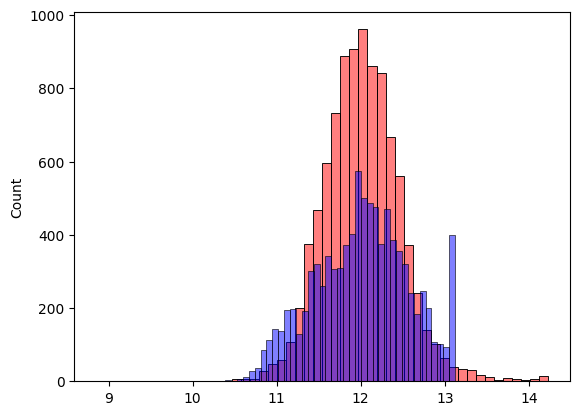

In [77]:
sns.histplot(y_pred, color='red', bins =50, alpha=0.5)
sns.histplot(y_train, color ='blue', bins =50, alpha=0.5)

RMSE

In [78]:
def rmse(y, y_pred):
  error = y-y_pred
  squared_error = error**2
  mean_squared_error =squared_error.mean()
  root_mean_squared_error=np.sqrt(mean_squared_error)
  return root_mean_squared_error

In [79]:
score_zero=rmse(y_train, y_pred)

In [80]:
round(score_zero, 2)

0.34

In [81]:
W0,W =train_linear_regression(X_train_mean, y_train)

In [82]:
y_pred = W0+ X_train_mean.dot(W)

In [83]:
score_mean= rmse(y_train, y_pred)

In [84]:
round(score_mean, 2)

0.34

##Q.4

In [85]:
def train_linear_regression_reg(X,y, r):
  ones = np.ones(X.shape[0])
  X = np.column_stack([ones, X])

  XTX= X.T.dot(X)
  XTX = XTX + np.eye(XTX.shape[0])*r
  XTX_inv = np.linalg.inv(XTX)
  res = XTX_inv.dot(X.T)
  W = res.dot(y)
  return W[0], W[1:]

Tuning the Model

In [86]:
X_train= X_train_zero
X_val = df_val.fillna(0)
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:

  W0,W =train_linear_regression_reg(X_train, y_train,r)
  y_pred = W0+ X_val.dot(W)
  score = round(rmse(y_val, y_pred),2)
  print(r, W0, score)


0 -9.763249477222304 112.74
1e-06 -9.763228830844218 112.74
0.0001 -9.76118523558492 112.74
0.001 -9.742646249628429 112.76
0.01 -9.561056192739576 112.91
0.1 -8.058889769453604 114.18
1 -3.1331542782818858 118.33
5 -0.8410867974328397 120.24
10 -0.4381172315580207 120.57


##Q.5

In [89]:
def prepare_X(df):
  df = df.copy()
  X=df.fillna(0).values
  return X

In [90]:
seed =[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [97]:
scores =[]
for s in seed:
  idx = np.arange(n)
  np.random.seed(s)
  np.random.shuffle(idx)
  df_train = df.iloc[idx[:n_train]]
  df_val = df.iloc[idx[n_train:n_train+n_val]]
  df_test =df.iloc[idx[n_train+n_val:]]

  df_train = df_train.reset_index(drop=True)
  df_val = df_val.reset_index(drop=True)
  df_test = df_test.reset_index(drop=True)

  y_train = np.log1p(df_train.median_house_value.values)
  y_val = np.log1p(df_val.median_house_value.values)
  y_test = np.log1p(df_test.median_house_value.values)

  del df_train['median_house_value']
  del df_val['median_house_value']
  del df_test['median_house_value']

  X_train = prepare_X(df_train)
  X_val = prepare_X(df_val)

  W0,W =train_linear_regression(X_train, y_train)
  y_pred = W0+ X_val.dot(W)

  score = rmse(y_val, y_pred)
  scores.append(score)
  print("score {} seed {}".format(score, s))

print(round(np.std(scores),3))

score 0.33773871600429795 seed 0
score 0.3377999353665367 seed 1
score 0.33842870067535874 seed 2
score 0.33200494683039145 seed 3
score 0.33944518625559017 seed 4
score 0.34338197052661196 seed 5
score 0.33853302117699696 seed 6
score 0.34687476972995035 seed 7
score 0.35127368659627567 seed 8
score 0.3341558266520752 seed 9
0.005


##Q.6

In [99]:
idx = np.arange(n)
np.random.seed(9)
np.random.shuffle(idx)
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test =df.iloc[idx[n_train+n_val:]]

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

df_full_train = pd.concat([df_train, df_val])
df_full_train = df_full_train.reset_index(drop=True)
X_full_train = prepare_X(df_full_train)

y_full_train = np.concatenate([y_train,y_val])

W0,W =train_linear_regression_reg(X_full_train, y_full_train,r=0.001)

X_test = prepare_X(df_test)

y_pred = W0+ X_test.dot(W)

score = rmse(y_test, y_pred)
scores.append(score)
print("score {}".format(score))

score 0.33498993366147484


## 2.15 Using the Model

In [ ]:
df_full_train = pd.concat([df_train, df_val])
df_full_train = df_full_train.reset_index(drop=True)
X_full_train = prepare_X(df_full_train)

y_full_train = np.concatenate([y_train,y_val])

W0,W =train_linear_regression_reg(X_full_train, y_full_train,r=10)


In [ ]:
X_test = prepare_X(df_test)
y_pred = W0+ X_test.dot(W)
score = rmse(y_test, y_pred)
print(r, W0, score)


1e-06 5.016195349199407 0.47442968627138055


In [ ]:
car = df_test.iloc[10].to_dict()

In [ ]:
type(car)

dict

In [ ]:
mini_df = pd.DataFrame([car])

In [ ]:
mini_df

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,cadillac,escalade_ext,2013,flex-fuel_(premium_unleaded_recommended/e85),403.0,8.0,automatic,all_wheel_drive,4.0,"crossover,flex_fuel,luxury,performance",large,crew_cab_pickup,18,13,1624


In [ ]:
y_mini = y_test[10]

In [ ]:
X_mini = prepare_X(mini_df)
y_pred = W0+ X_mini.dot(W)
score = rmse(y_mini, y_pred)
print(r, W0, score)

1e-06 5.016195349199407 0.2892951266472057


In [ ]:
np.expm1(y_pred[0])

52145.56688379999

In [ ]:
np.expm1(y_mini)

69639.99999999997